In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2024-11-30'
stock ='GOOG'

data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-01-03,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
2012-01-04,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2012-01-05,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
2012-01-06,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
2012-01-09,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...
2024-11-22,166.570007,166.570007,168.264999,165.710007,167.160004,24497000
2024-11-25,169.429993,169.429993,170.460007,167.399994,167.990005,21395700


In [5]:
# Reset index to make 'Date' a column
data.reset_index(inplace=True)

# Flatten MultiIndex column names if present and remove "GOOG"
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

# Remove "GOOG" from column names
data.columns = [col.replace(" GOOG", "").strip() for col in data.columns]

# Display cleaned DataFrame
print(data.head())

        Date  Adj Close      Close       High        Low       Open     Volume
0 2012-01-03  16.532528  16.573130  16.641375  16.248346  16.262545  147611217
1 2012-01-04  16.603836  16.644611  16.693678  16.453827  16.563665  114989399
2 2012-01-05  16.373516  16.413727  16.537264  16.344486  16.491436  131808205
3 2012-01-06  16.150156  16.189817  16.438385  16.184088  16.417213  108119746
4 2012-01-09  15.465409  15.503389  16.114599  15.472754  16.102144  233776981


In [6]:
ma_100_days = data.Close.rolling(100).mean()

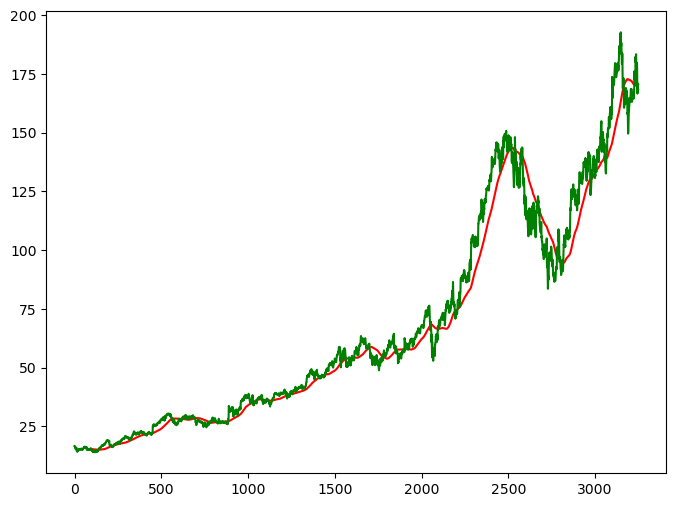

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [9]:
ma_200_days= data.Close.rolling(200).mean()

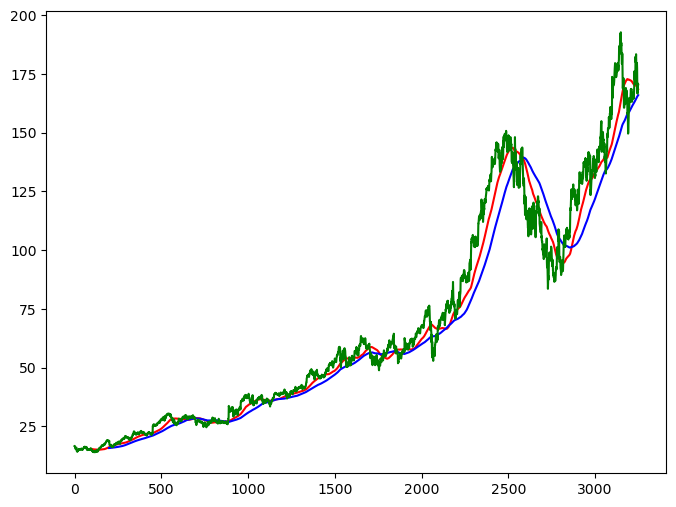

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace =True)

In [14]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])
                        

In [15]:
data_train.shape[0], data_test.shape[0]

(2599, 650)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [19]:
x,y = np.array(x),np.array(y)

In [20]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [21]:
model=Sequential()
model.add(LSTM(units =50, activation ='relu', return_sequences =True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation ='relu', return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation ='relu', return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='loss',        # Monitor training loss (since no validation data is provided here)
    patience=5,            # Stop if no improvement after 5 epochs
    verbose=1,             # Print stopping message
    restore_best_weights=True  # Restore weights from the best epoch
)

# Fit the model with EarlyStopping
model.fit(
    x, y,
    epochs=50,             # Maximum number of epochs
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)


Epoch 1/50
79/79 [==============================] - 77s 925ms/step - loss: 0.0184
Epoch 2/50
79/79 [==============================] - 72s 917ms/step - loss: 0.0045
Epoch 3/50
79/79 [==============================] - 75s 947ms/step - loss: 0.0039
Epoch 4/50
79/79 [==============================] - 74s 941ms/step - loss: 0.0035
Epoch 5/50
79/79 [==============================] - 74s 938ms/step - loss: 0.0047
Epoch 6/50
79/79 [==============================] - 73s 921ms/step - loss: 0.0035
Epoch 7/50
79/79 [==============================] - 73s 925ms/step - loss: 0.0032
Epoch 8/50
79/79 [==============================] - 74s 939ms/step - loss: 0.0029
Epoch 9/50
79/79 [==============================] - 75s 950ms/step - loss: 0.0031
Epoch 10/50
79/79 [==============================] - 73s 927ms/step - loss: 0.0030
Epoch 11/50
79/79 [==============================] - 74s 941ms/step - loss: 0.0026
Epoch 12/50
79/79 [==============================] - 75s 951ms/step - loss: 0.0030
Epoch 13/50
7

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
pas_100_days=data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [26]:
data_test

,Close
0,148.036499
1,148.720505
2,148.106003
3,148.675003
4,146.704498
...,...
745,166.570007
746,169.429993
747,170.619995
748,170.820007


In [27]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [28]:
x,y=np.array(x),np.array(y)

In [29]:
y_pred = model.predict(x)

79/79 [==============================] - 11s 128ms/step


In [30]:
y_pred

array([[0.07903884],
       [0.0790815 ],
       [0.07909901],
       ...,
       [0.85402524],
       [0.84845865],
       [0.84254265]], dtype=float32)

In [32]:
scale = 1/scaler.scale_

In [33]:
scale

array([109.1700058])

In [34]:
y_pred = y_pred * scale 
y = y*scale

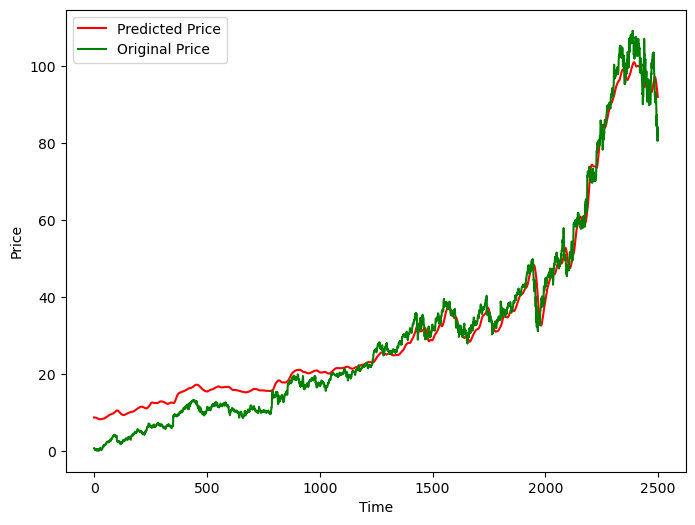

In [39]:
plt.figure(figsize = (8,6))
plt.plot(y_pred,'r',label = "Predicted Price")
plt.plot(y,'g',label="Original Price")
plt.xlabel('Time')
plt.ylabel('Price')           
plt.legend()
plt.show()

1/1 [==============================] - 0s 121ms/step


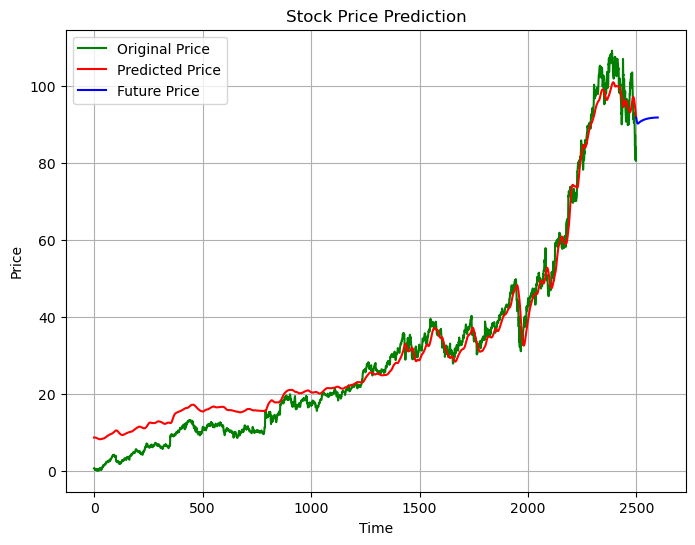

In [40]:
# Increase the number of future days to predict
future_days = 100  # Adjust this value as needed for a longer forecast

# Prepare the base input (last 100 days of scaled data)
last_100_days = data_test_scale[-100:]
future_predictions = []

# Predict iteratively
for _ in range(future_days):
    # Reshape for model input
    last_100_days_reshaped = last_100_days.reshape(1, last_100_days.shape[0], 1)
    
    # Predict the next value
    next_pred = model.predict(last_100_days_reshaped)
    
    # Append the prediction to the future_predictions list
    future_predictions.append(next_pred[0, 0])
    
    # Update the last_100_days with the new prediction
    last_100_days = np.append(last_100_days, next_pred[0, 0])
    last_100_days = last_100_days[-100:]  # Keep the last 100 days

# Rescale future predictions to original price scale
future_predictions = np.array(future_predictions) * scale

# Create a timeline for plotting
future_timeline = np.arange(len(y), len(y) + future_days)

# Plot Original, Predicted, and Future Prices
plt.figure(figsize=(8, 6))
plt.plot(y, 'g', label="Original Price")  # Original prices
plt.plot(range(len(y)), y_pred, 'r', label="Predicted Price")  # Predicted on test data
plt.plot(future_timeline, future_predictions, 'b', label="Future Price")  # Future predictions
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
model.save('Stock Predictions Model.keras')